# Visualizing ranges and uncertainty

Visualizing errors and ranges are a common need in data science. We often find ourselves in situations where there is some inherent uncertainty in our data and the information we're presenting is an estimate with some likely error. Similarly, we can sometimes find ourselves wanting to visualize average values along with the smallest ever seen or the largest ever seen to know by how much a quantity could vary. For example, imagine that you wanted to plot the mean hourly temperature and want to see what was the highest and lowest ever experienced on that day in a given year.

In all of these situations, visualizing ranges and/or uncertainty can be important.

# Errorbars

There are many situations in which we have calculated margins of error for estimates that we provide. Perhaps we are designing a new education program and a particular intervention has been shown to increase a grade point average of a student by 0.2 points with a confidence interval of +/1 0.05 points. This demonstrates that there is some variability that remains even though we have seen an average outcome of 0.2 points of improvement. Or perhaps we are forecasting gross domestic product growth rates in countries, but we know there is uncertainty in our estimates so we estimate 5% growth with a confidence interval of +/-2%. The larger the confidence interval or error bars, the larger the uncertainty, so it can help those receiving the information determine how much variability to factor in to any downstream uses of the data.

Let's take a look at how we can do this. We'll start by taking a look at how to implement error bars in matplotlib. We'll explore two cases: (1) when the errorbars are the same for all points and (2) when the errors vary by point.

We can implement either of these cases with the `errorbar` method. Before we implement the error bar, let's plot the data we'll be using.

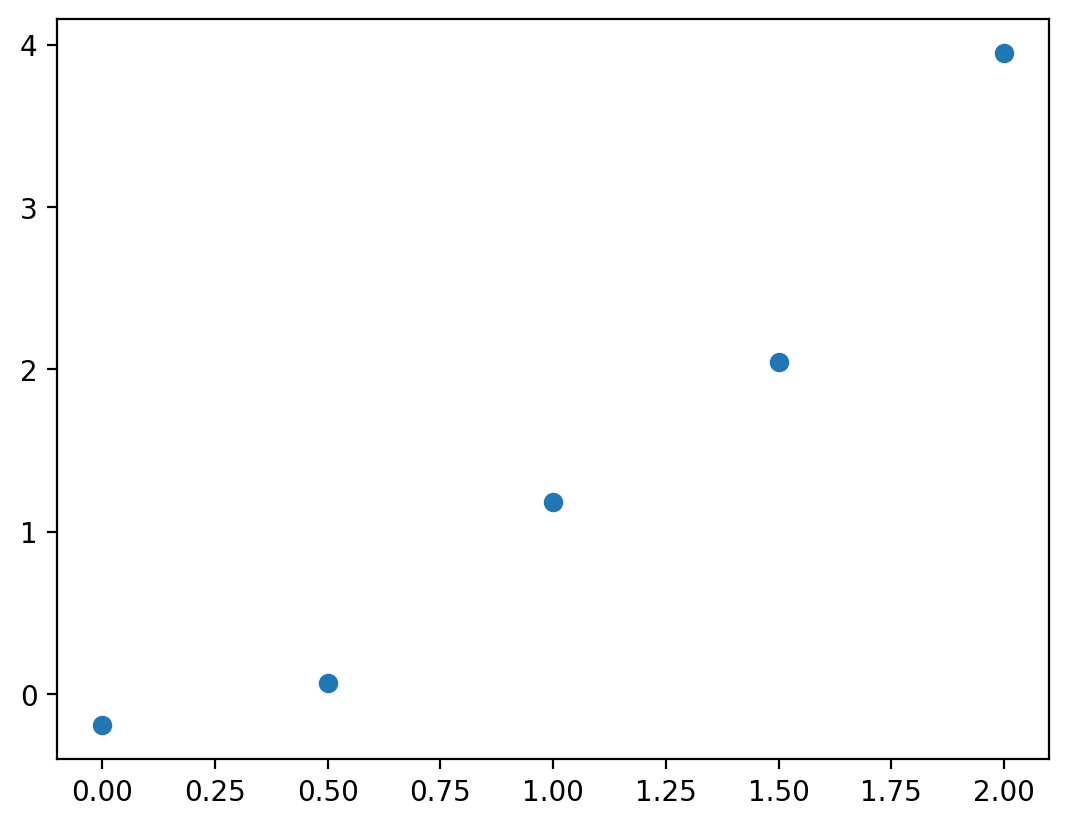

In [92]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

N = 5
x = np.linspace(0, 2, N)
y = x**2 + np.random.randn(N) * 0.2

fig, ax = plt.subplots()
ax.scatter(x, y)

Let's say these data represented model outputs and we had evidence to demonstrate that 95% of the time the true value fell within 0.5 units of the true estimate. We can communicate this using the `errorbar` method:

<ErrorbarContainer object of 3 artists>

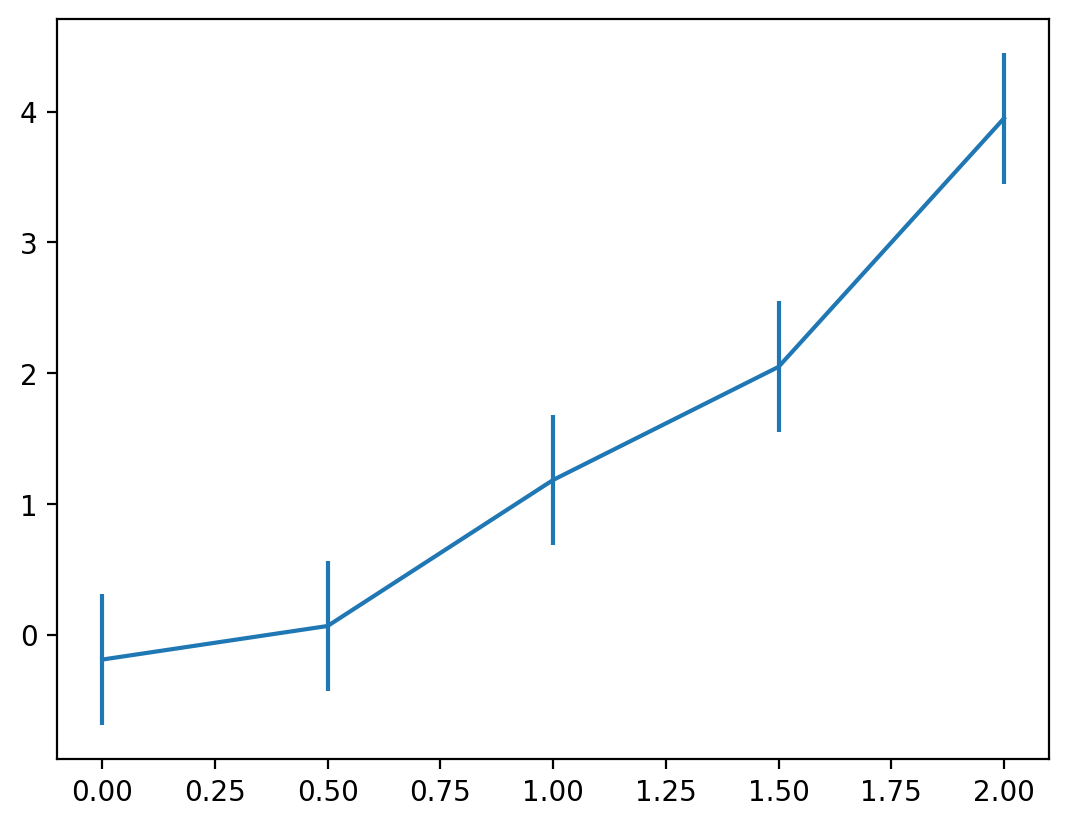

In [93]:
fig, ax = plt.subplots()
error = 0.5
ax.errorbar(x, y, yerr=error)

Here, we can see that for each point the errors are represented as lines that extend above and below the estimated value. Perhaps we don't want to show the lines in between since this was meant to be a scatter plot of data. We can adjust a few parameters to make this easier to read:

- `capsize`: the length of the error bar cap
- `ecolor`: the color of the errorbar lines
- `marker`: the style of marker to use for each point (e.g. 'o' is a circle, 's' is a square)
- `markerfacecolor`: the marker's inner color
- `markeredgecolor`: the marker's outer color
- `linestyle`: the style of the line, e.g., solid ('-'), dashed ('--'), or none ('none')

Let's adjust these parameters a bit to make it clearer that the central point is the estimate and the error bars are indicating the uncertaintly:

<ErrorbarContainer object of 3 artists>

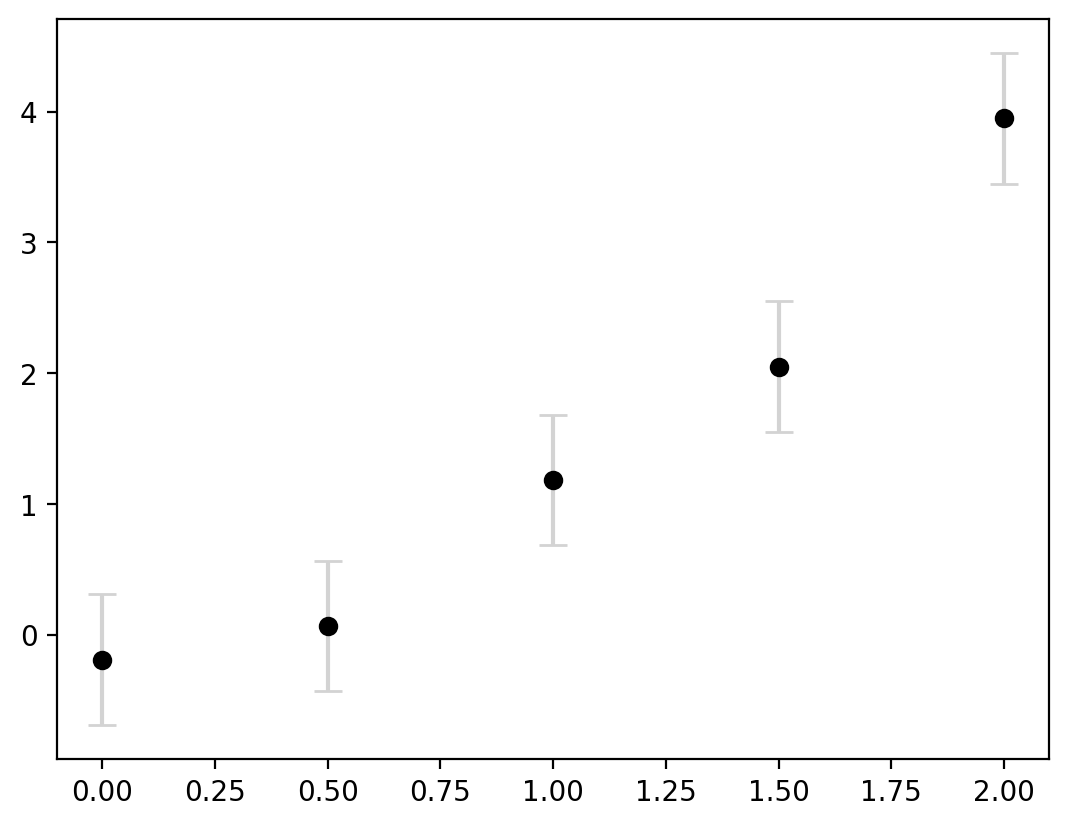

In [94]:
fig, ax = plt.subplots()
error = 0.5
ax.errorbar(
    x,
    y,
    yerr=error,
    capsize=5,
    ecolor="lightgrey",
    markerfacecolor="black",
    markeredgecolor="black",
    marker="o",
    linestyle="none",
)

## 

Sometimes, we may have different intervals for each plot. So we can alternatively feed in an array to `yerr` instead of a scalar:

<ErrorbarContainer object of 3 artists>

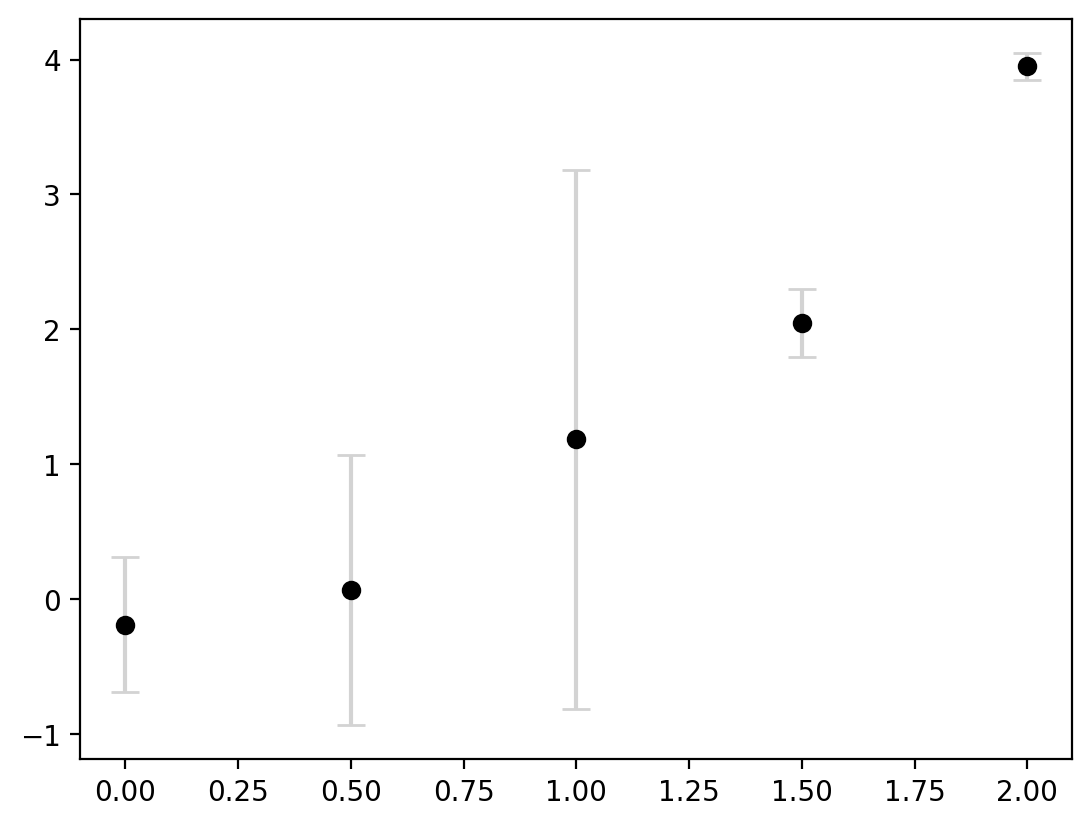

In [95]:
fig, ax = plt.subplots()
error = [0.5, 1, 2, 0.25, 0.1]
ax.errorbar(
    x,
    y,
    yerr=error,
    capsize=5,
    ecolor="lightgrey",
    markerfacecolor="black",
    markeredgecolor="black",
    marker="o",
    linestyle="none",
)

This now clearly communicates that there are different levels of certainty around each estimate. Lastly, the errorbars are not always symmetric. We can do this by inputting a 2D array for `yerr` where there are two entries for every value in `y`.

<ErrorbarContainer object of 3 artists>

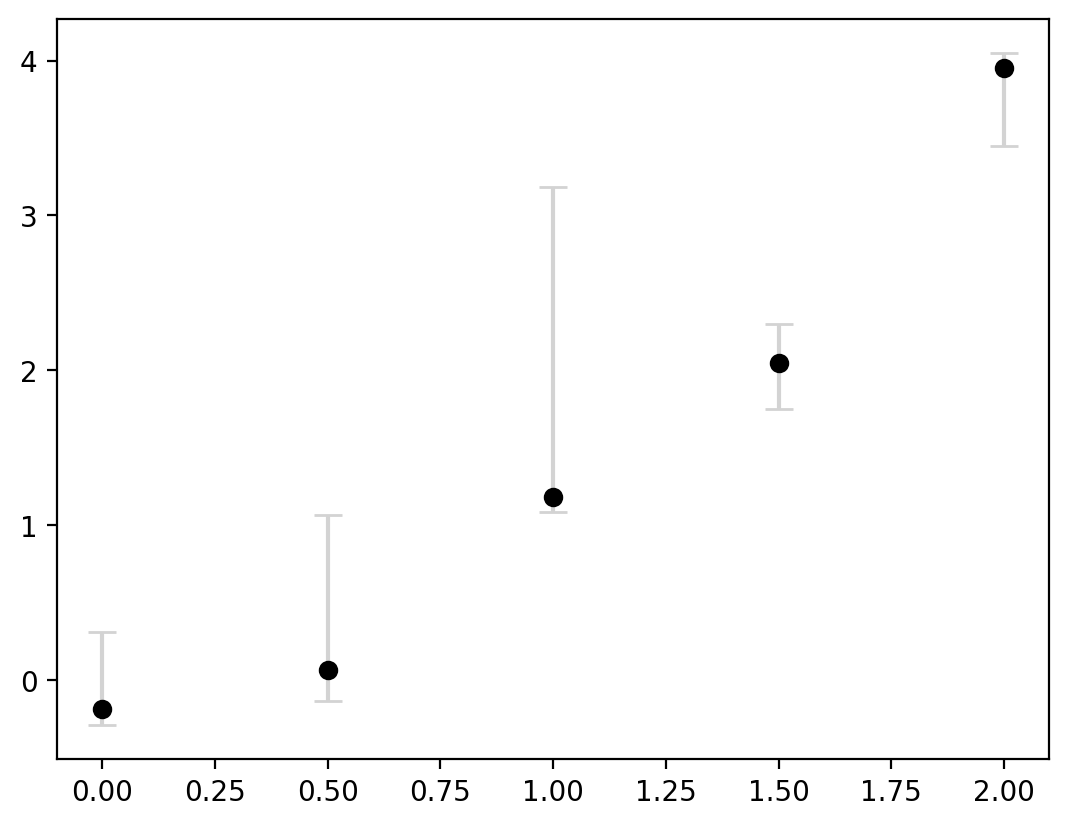

In [96]:
fig, ax = plt.subplots()
error_below = [0.1, 0.2, 0.1, 0.3, 0.5]
error_above = [0.5, 1, 2, 0.25, 0.1]
error = [error_below, error_above]

ax.errorbar(
    x,
    y,
    yerr=error,
    capsize=5,
    ecolor="lightgrey",
    markerfacecolor="black",
    markeredgecolor="black",
    marker="o",
    linestyle="none",
)

This entire process can be adjusted to flip the axes as well in case a horizontal display is more useful by using `xerr` instead of `yerr` and for our data, flipping the x and y inputs:

<ErrorbarContainer object of 3 artists>

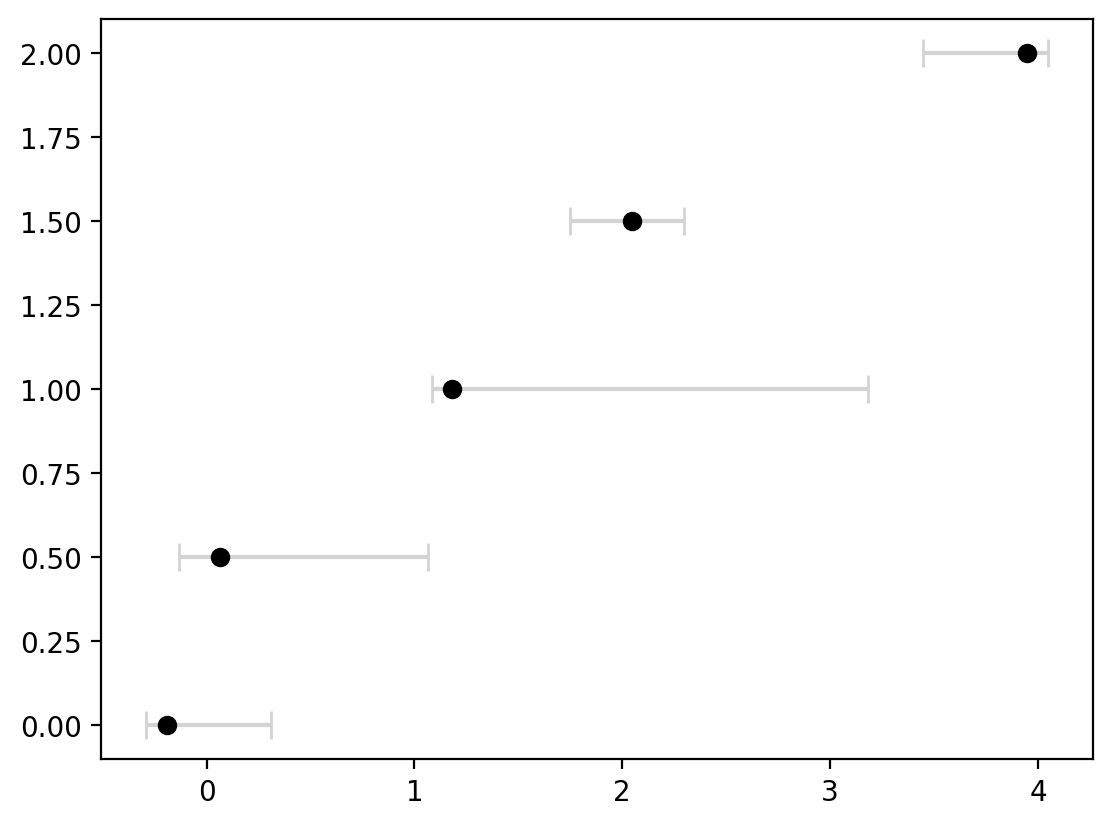

In [97]:
fig, ax = plt.subplots()
error_below = [0.1, 0.2, 0.1, 0.3, 0.5]
error_above = [0.5, 1, 2, 0.25, 0.1]
error = [error_below, error_above]

ax.errorbar(
    y,
    x,
    xerr=error,
    capsize=5,
    ecolor="lightgrey",
    markerfacecolor="black",
    markeredgecolor="black",
    marker="o",
    linestyle="none",
)

## Fill between for continuous ranges

Errorbars are particularly helpful when our datapoints are discrete. In the example above we had 5 points and they each had errorbars associated with them. What if the data are continuous? Let's start with a basic example where we have three lines we wish to plot which represent the maximum, minimum, and average value for a function. Let's just plot these to start with:

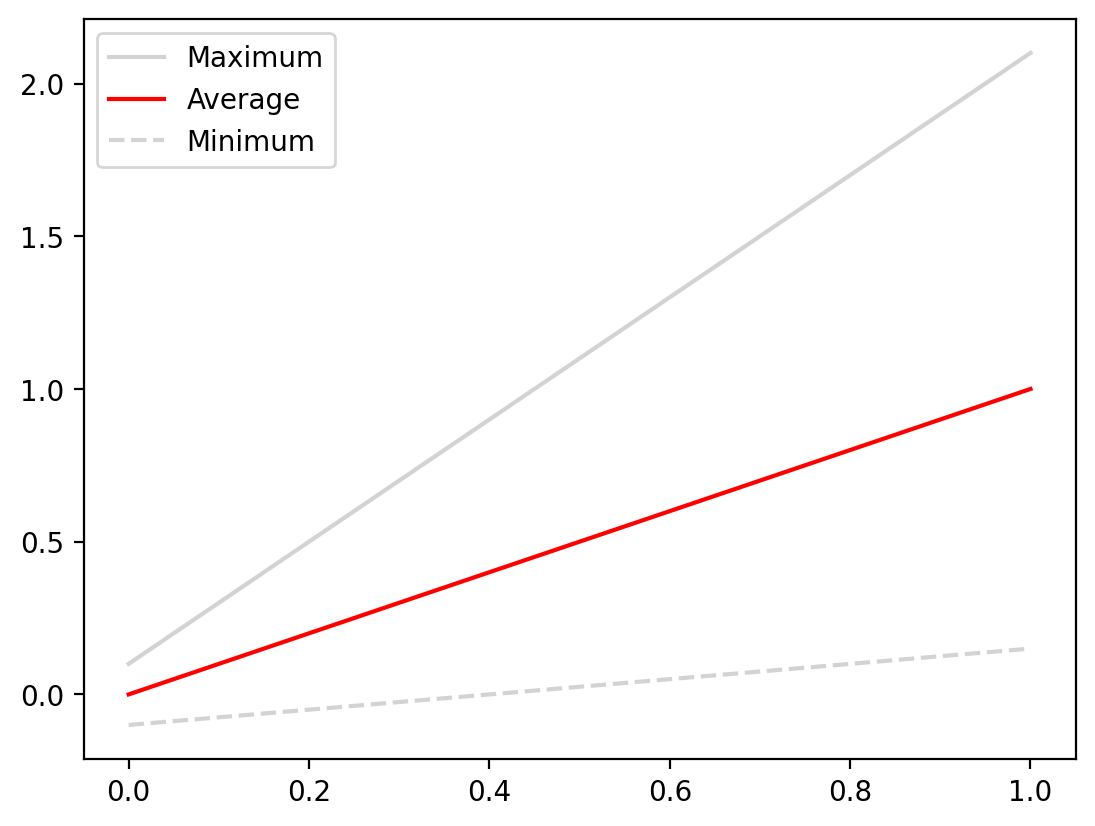

In [98]:
import numpy as np

x = np.linspace(0, 1, 100)
y_average = x
y_minimum = 0.25 * x - 0.1
y_maximum = 2 * x + 0.1

fig, ax = plt.subplots()
ax.plot(x, y_maximum, color="lightgrey", label="Maximum")
ax.plot(x, y_average, color="red", label="Average")
ax.plot(x, y_minimum, color="lightgrey", linestyle="--", label="Minimum")

ax.legend()

When looking at this plot the fact that the maximum and minimum lines are upper and lower limit are not immediately evident until you read the plot. This can be made more explicit using the `fill_between` method, which fills the space between two curves with a color or pattern of your choosing. It takes three arguments: x and then the upper and lower y values. Let's see this in action:

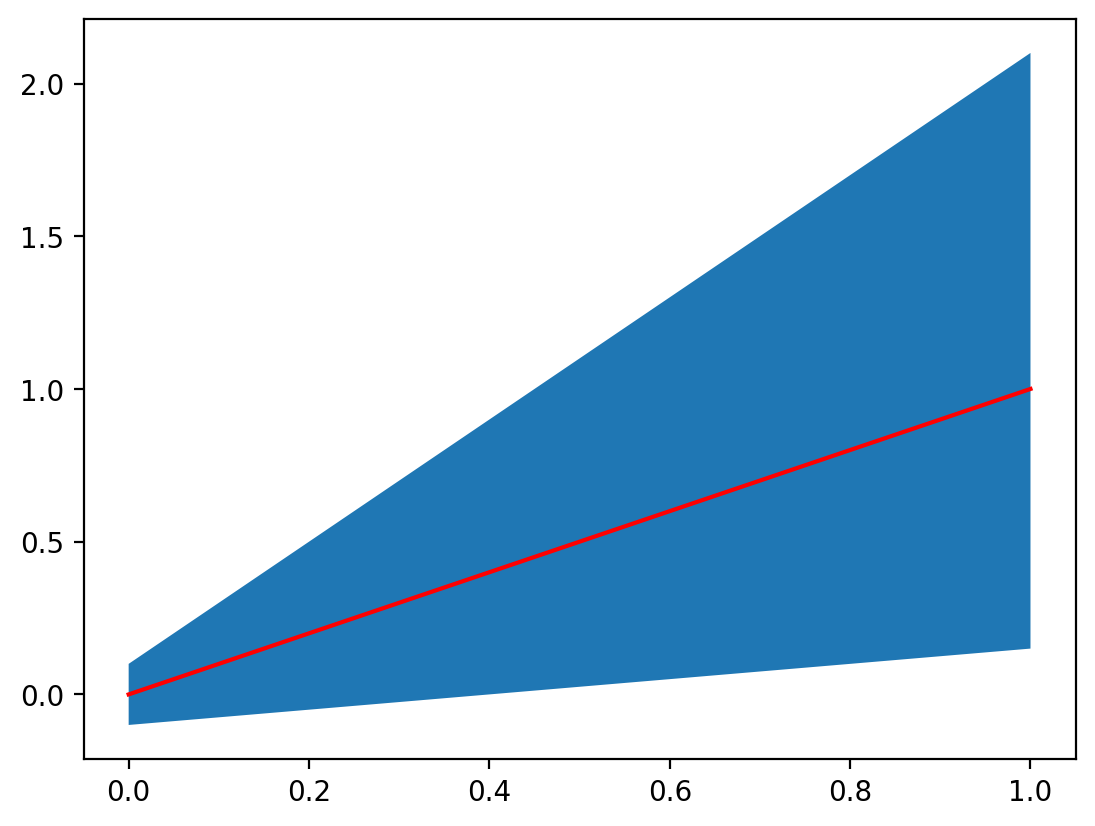

In [99]:
fig, ax = plt.subplots()
ax.fill_between(x, y_minimum, y_maximum)
ax.plot(x, y_average, color="red", label="Average")

While this is interesting, let's make it clearer by changing the colors:

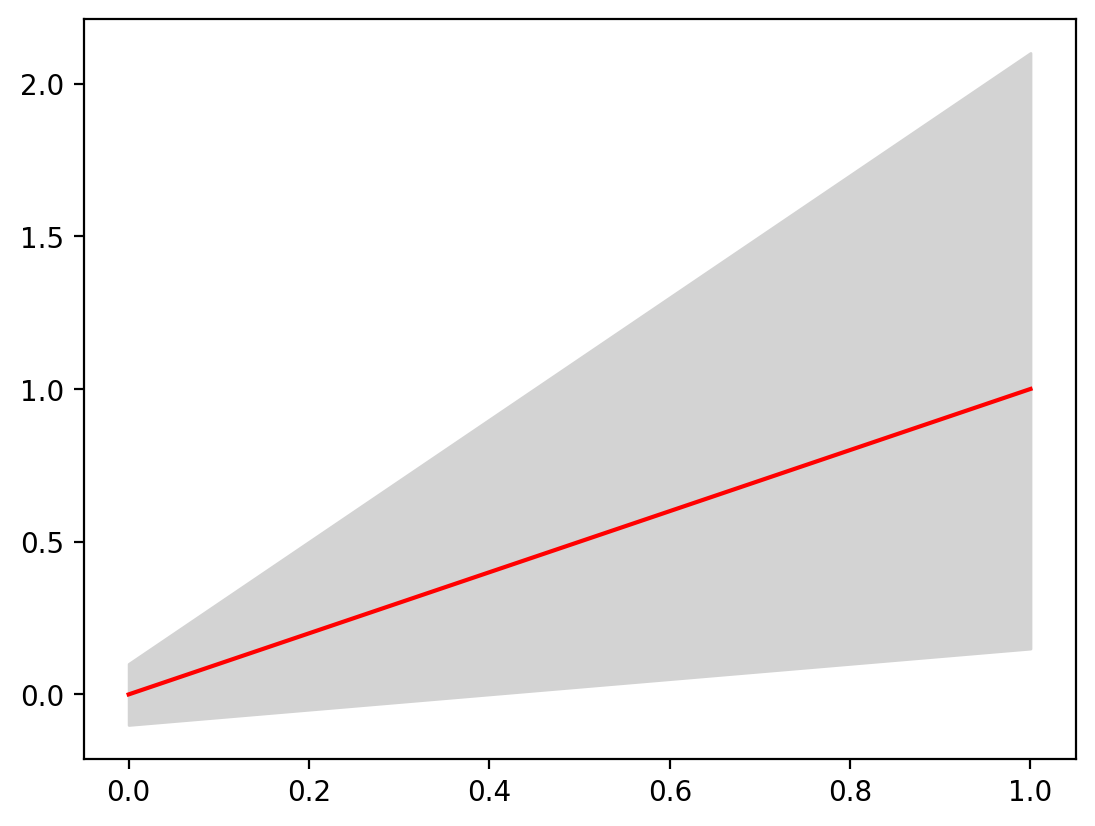

In [100]:
fig, ax = plt.subplots()
ax.fill_between(x, y_minimum, y_maximum, color="lightgrey")
ax.plot(x, y_average, color="red", label="Average")

We can even add a legend:

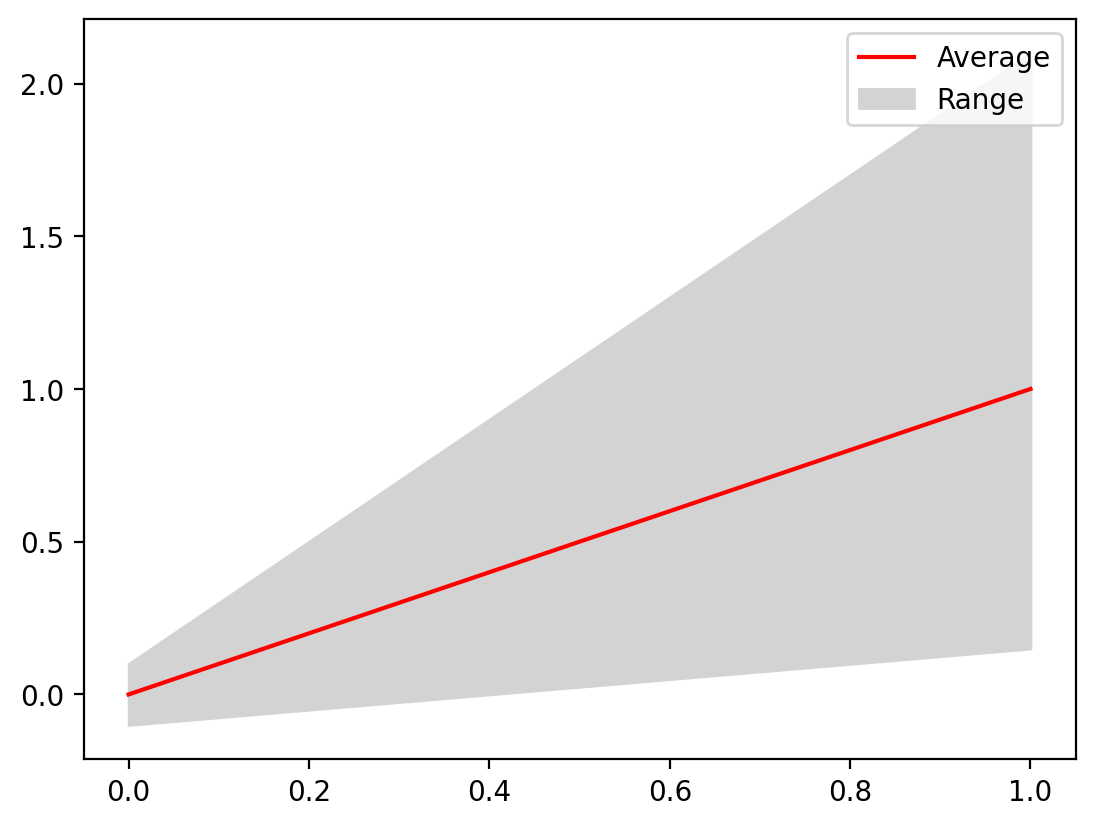

In [101]:
fig, ax = plt.subplots()
fill = ax.fill_between(x, y_minimum, y_maximum, color="lightgrey")
(line,) = ax.plot(x, y_average, color="red", label="Average")

ax.legend([line, fill], ["Average", "Range"])

## In-depth application: how hot is "hot" in Phoenix, Arizona?

Let's consider a real world example of applying this technique. Phoenix, Arizona is consistently warm, but what is truly hot and what is the hottest of hot in Phoenix? Let's explore this with some 2013 temperature data that was [shared as a Kaggle dataset](https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data/). There was some preprocessing done to these data to extract the months of June, July, and August to focus on the hottest months of the year. The temperature was also converted to Fehrenheit and is provided hourly. let's inspect our data:

In [102]:
import pandas as pd

temp = pd.read_csv("data/phoenix_summer_temperature.csv")
temp

,datetime,temperature
0,6/1/13 0:00,83.1020
1,6/1/13 1:00,80.7980
2,6/1/13 2:00,78.2060
3,6/1/13 3:00,76.3520
4,6/1/13 4:00,74.4440
...,...,...
2203,8/31/13 19:00,90.9896
2204,8/31/13 20:00,88.2743
2205,8/31/13 21:00,86.8778
2206,8/31/13 22:00,84.4922


In [103]:
temp["temperature"].max()

116.024

We can already see that maximum temperature in 2013 was 116 degrees - ouch! To get a sense for the variability in the values, let's plot every 24 hour period as a single time series in a plot. Since June has 30 days and July and August have 31 days, there will be 92 separate plots involved.

Before we can do that, we need to get the data structured as one timeseries to represent each day, meaning one row per every 24 hour period. . We can do this simply with the numpy `reshape` method since we know this dataset has no missing values:

In [104]:
temp_matrix = np.reshape(temp["temperature"].values, (-1, 24))
temp_matrix.shape

(92, 24)

Great! Now we can plot each of these time series. Let's start by just plotting a few of the timeseries to get a feel for the data.

First we can plot one day:


Text(0, 0.5, 'Temperature [F]')

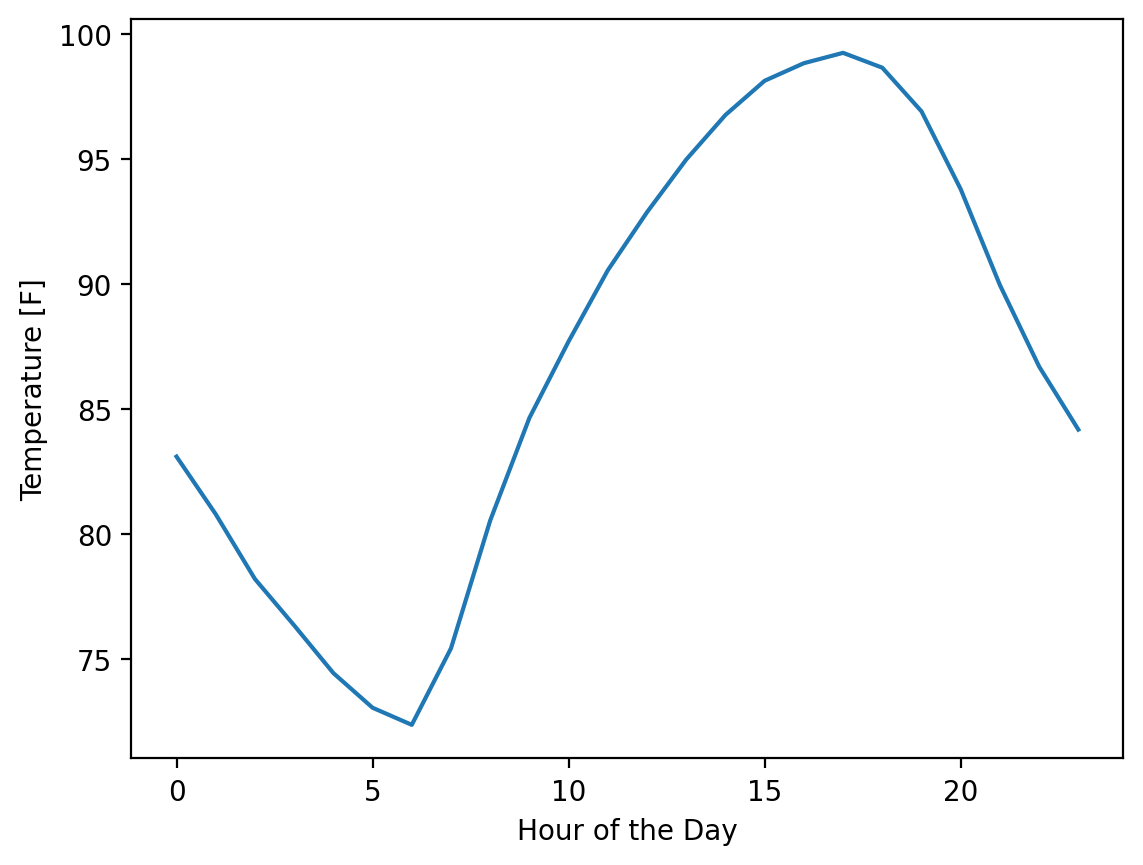

In [105]:
fig, ax = plt.subplots()
hours = np.arange(0, 24)  # One entry for each hour of the day

ax.plot(hours, temp_matrix[0])
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Temperature [F]")

Now, let's plot 3 days.

One technical note here - we can plot multiple datasets at a time in matplotlib by entering in a matrix for the y values. However, matplotlib prefers the data entered as each *column* in a `y` matrix representing a data set. We can make this adjustment by transposing our data when we plot it with the `.T` method at the end of our numpy array.

Text(0, 0.5, 'Temperature [F]')

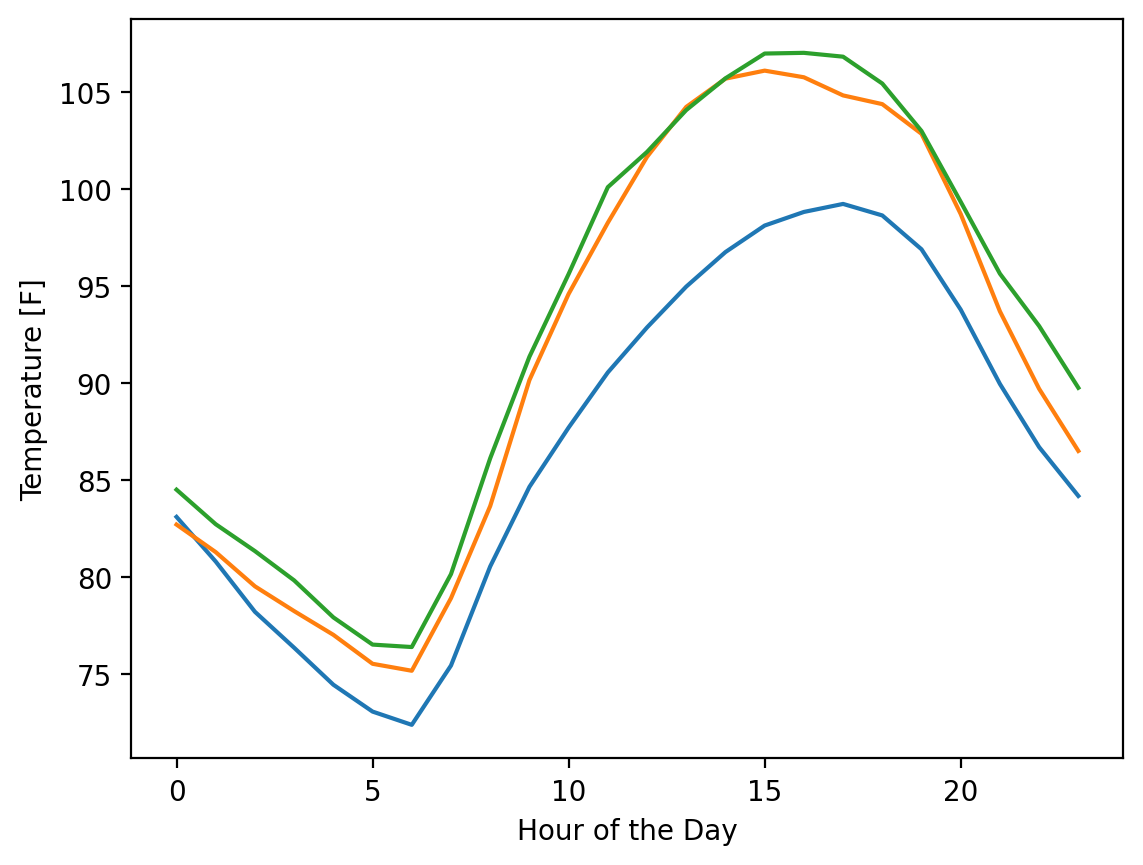

In [106]:
fig, ax = plt.subplots()

ax.plot(hours, temp_matrix[0:3].T)
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Temperature [F]")

Next, let's plot all 92 days:

Text(0, 0.5, 'Temperature [F]')

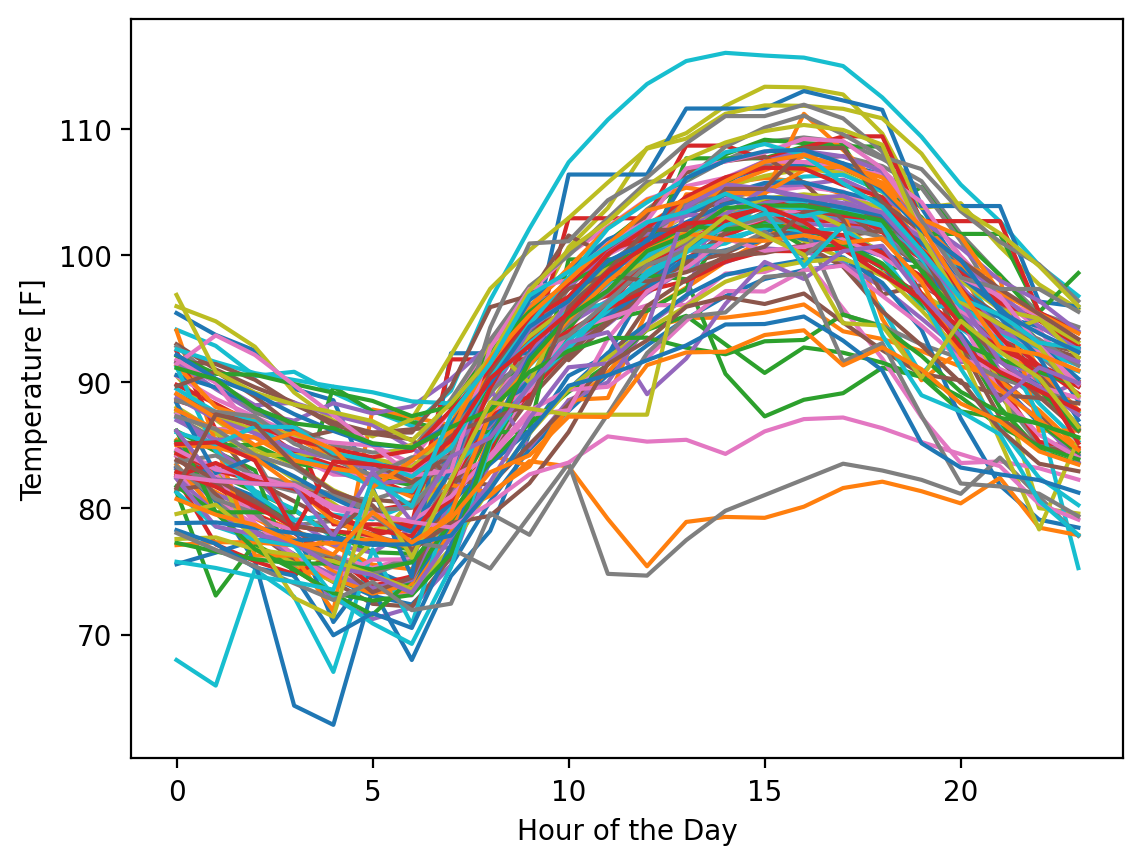

In [107]:
fig, ax = plt.subplots()

ax.plot(hours, temp_matrix.T)
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Temperature [F]")

Obviously, this is a data visualization mess and you should never plot this many lines on one plot if there was a goal to understand something about individual lines, but fortunately, that's not our interest here. We want to know what the range of possible values are across this period. Let's calculate the mean, minimum, and maximum for every hour of the day across all 92 days:

In [108]:
temp_mean = temp_matrix.mean(axis=0)
temp_min = temp_matrix.min(axis=0)
temp_max = temp_matrix.max(axis=0)

In [109]:
temp_mean.shape

(24,)

Excellent! Now let's plot the range between the min and the max with the mean clearly marked:

Text(0, 0.5, 'Temperature [F]')

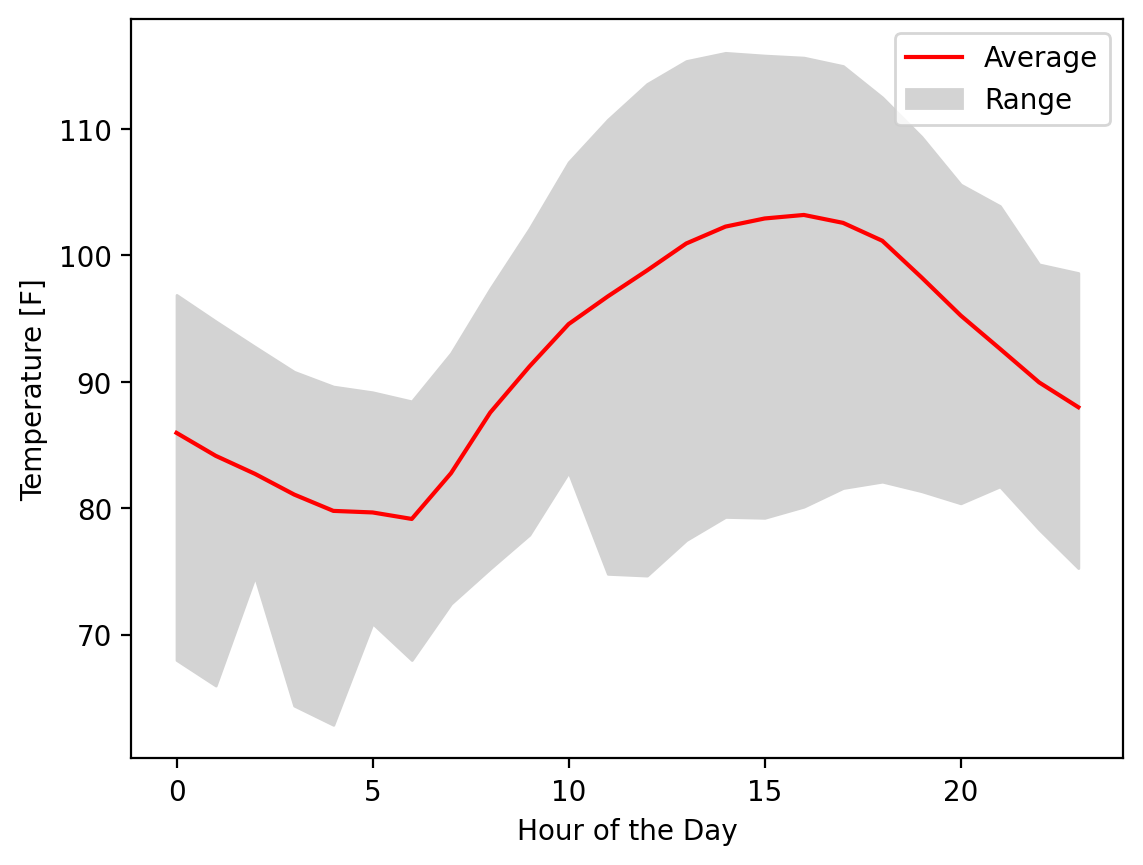

In [110]:
fig, ax = plt.subplots()
fill = ax.fill_between(hours, temp_min, temp_max, color="lightgrey")
(line,) = ax.plot(hours, temp_mean, color="red")

ax.legend([line, fill], ["Average", "Range"])
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Temperature [F]")

If we wanted one more touch, we could add, in very thin lines the individual time series, with some transparency to be clear that we included all the data for the reader:

Text(0, 0.5, 'Temperature [F]')

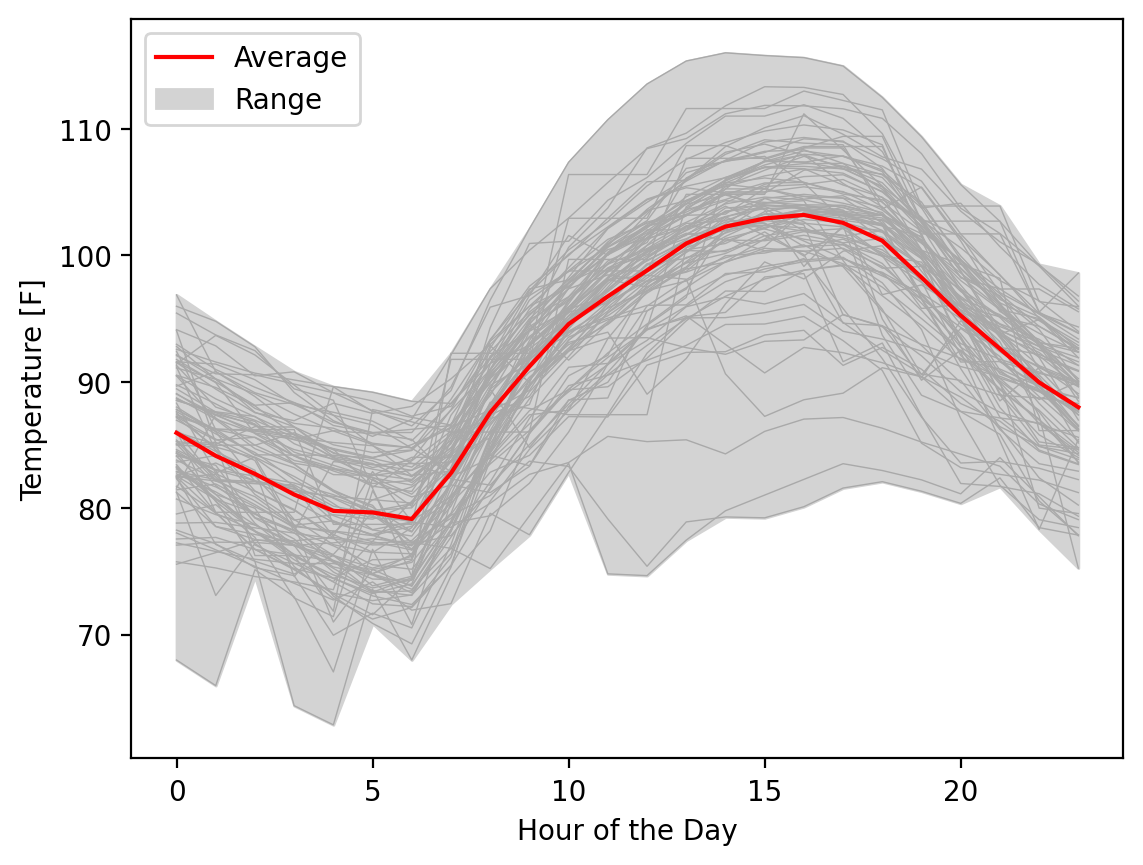

In [111]:
fig, ax = plt.subplots()
fill = ax.fill_between(hours, temp_min, temp_max, color="lightgrey")
ax.plot(hours, temp_matrix.T, linewidth=0.5, color="darkgrey")
(line,) = ax.plot(hours, temp_mean, color="red")

ax.legend([line, fill], ["Average", "Range"])
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Temperature [F]")

Showing data ranges and uncertainty is critical to accurately representing your data so others can accurately interpret the information and make decisions based on it. The `errorbar` and `fill_between` methods offer simple-to-use solutions for these situations.